In [1]:
%load_ext lab_black

In [2]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf, DictConfig
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
import nb_eval.matplotlib_functions as mympf
from cfg.convert_cfg_to_yaml import save_myyaml_from_mycfg
from Data import Data_eval
from include.loss import pixel_weighted_cross_entropy
import model_eval
import models.reg as rm


import matplotlib_functions as mympf

mympf.setMatplotlibParam()
plt.viridis()

dir_res = "/cerea_raid/users/dumontj/dev/coco2/dl/res"

2023-03-01 18:32:20.301470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 1920x1440 with 0 Axes>

In [3]:
name_model = "/cerea_raid/users/dumontj/dev/coco2/dl/res/inversion/inv_pat_sweep/0"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Pat/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forPat_2/valid_dataset.nc"

### On extra_valid data

In [4]:
data = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model),
    path_eval_nc,
)

model = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model), name_w="w_best.h5"
)

2023-03-01 18:32:31.611797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 18:32:32.155327: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14757 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [5]:
metrics = model_eval.get_inv_metrics_model_on_data(model, data)
print("mae:", np.mean(metrics["mae"]))
print("mape:", np.mean(metrics["mape"]))

2023-03-01 18:32:34.020569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-01 18:32:34.621996: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


197/197 [==============================] - 3s 5ms/step
mae: 2.3372295
mape: 43.813187


In [6]:
mean_metrics = model_eval.get_inv_mean_loss(data)
print("mae:", np.mean(mean_metrics["mae"]))
print("mape:", np.mean(mean_metrics["mape"]))

mae: 1.1065193
mape: 20.698412


197/197 [==============================] - 1s 4ms/step


<Figure size 1920x1440 with 0 Axes>

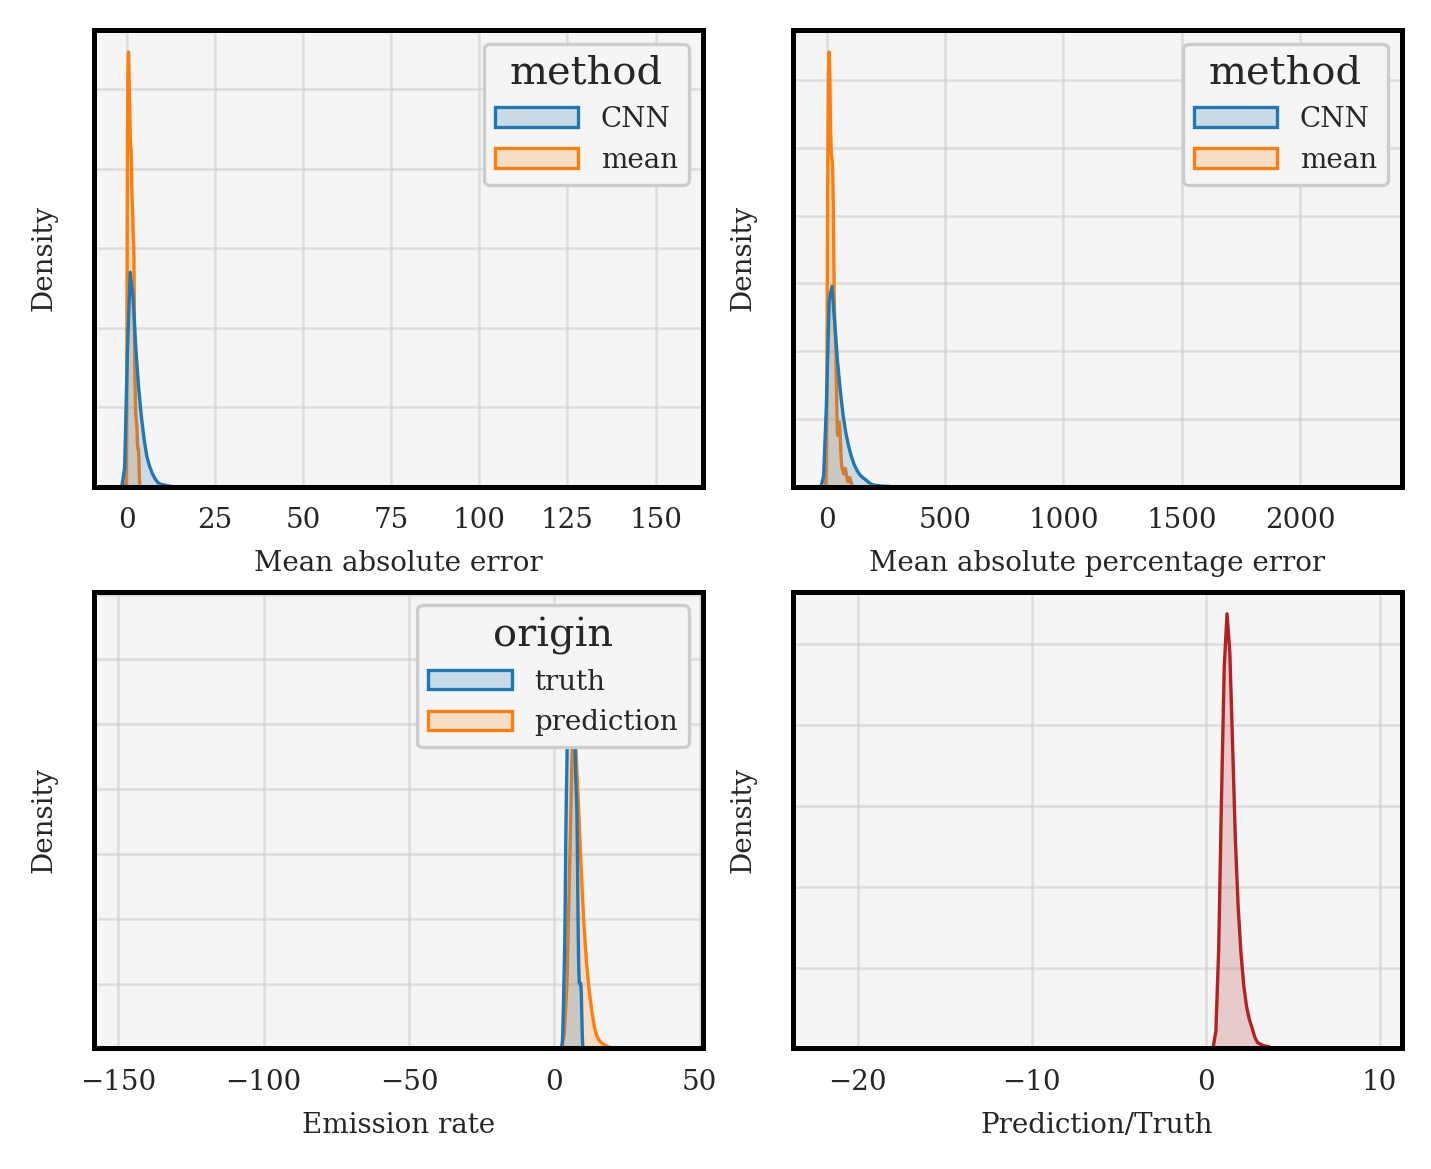

In [7]:
model_eval.get_summary_histo_inversion(model, data)

nwbce: tf.Tensor(0.22997522, shape=(), dtype=float32)
idx 1402
origin: smart_2km_Pat_64
time: 2015-03-24T10:00:00.000000000
emiss: [7.802945 7.674222 5.933443]
nwbce: tf.Tensor(1.9212108, shape=(), dtype=float32)
idx 3221
origin: smart_2km_Pat_64
time: 2015-07-02T05:00:00.000000000
emiss: [4.230031 3.753749 3.806544]
nwbce: tf.Tensor(0.41914892, shape=(), dtype=float32)
idx 2801
origin: smart_2km_Pat_64
time: 2015-06-10T17:00:00.000000000
emiss: [5.683669 6.002658 6.108758]
1/1 [==============================] - 0s 16ms/step


<Figure size 1920x1440 with 0 Axes>

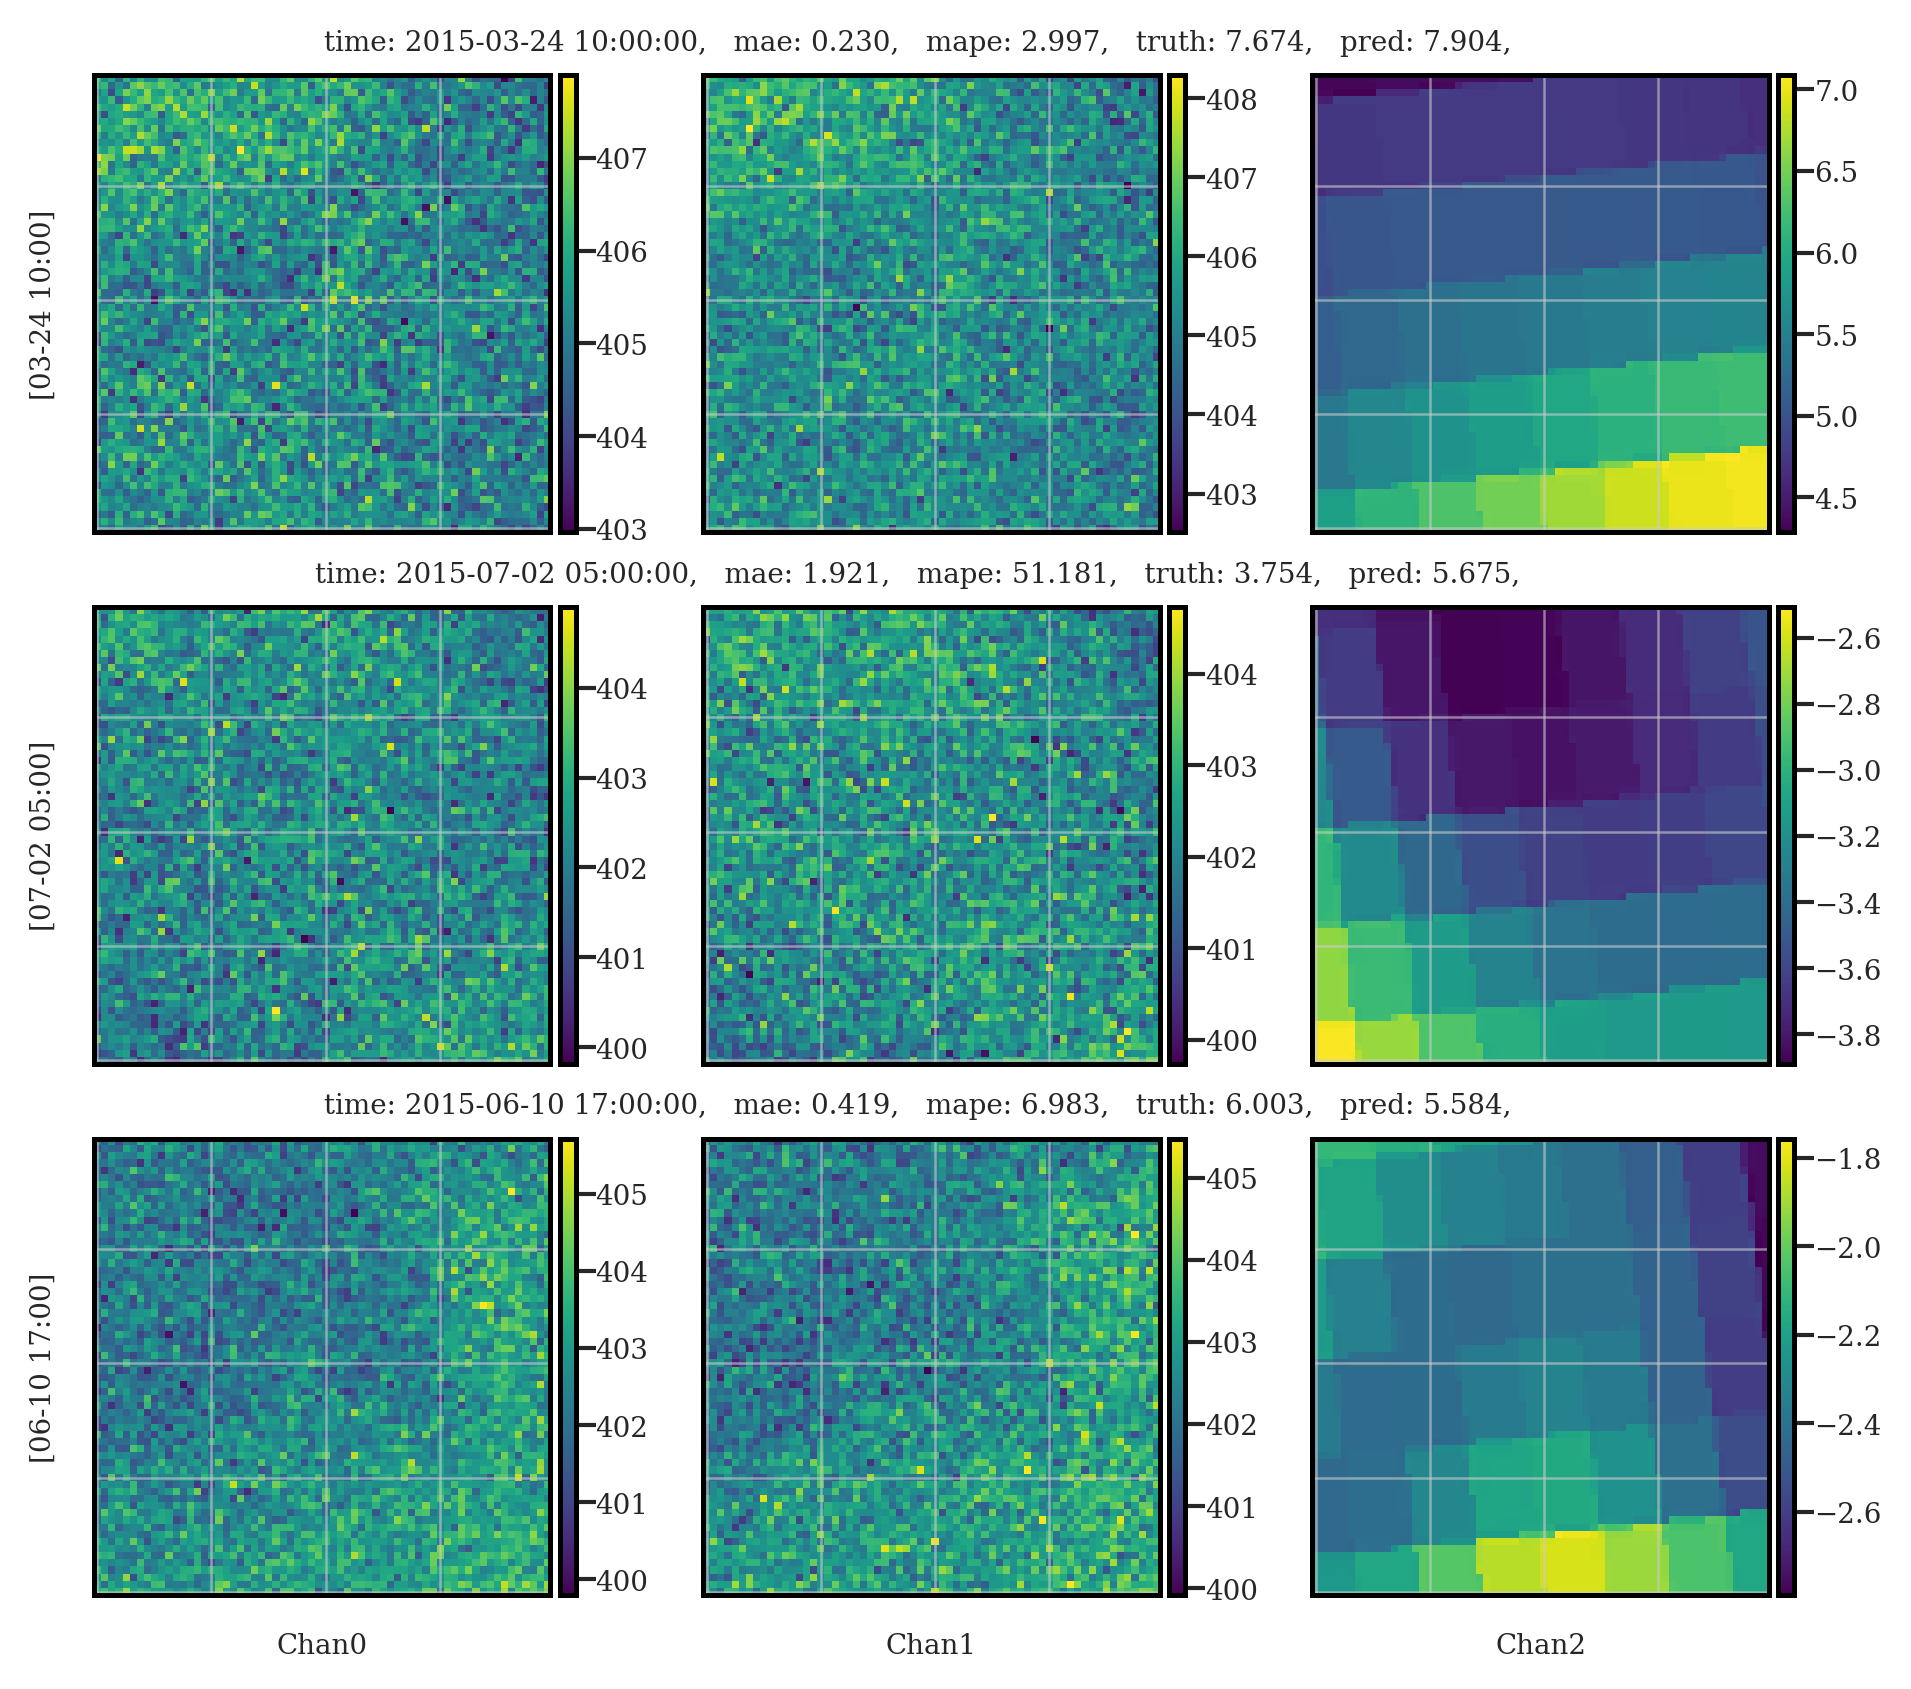

In [8]:
model_eval.plot_inversion_examples(data, metrics["mae"], metrics["mape"], model)

### On validation dataset

In [9]:
data_val = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model),
    path_valid_nc,
)

In [10]:
metrics_val = model_eval.get_inv_metrics_model_on_data(model, data_val)
print("mae:", np.mean(metrics_val["mae"]))
print("mape:", np.mean(metrics_val["mape"]))

144/144 [==============================] - 1s 4ms/step
mae: 3.1444042
mape: 24.393858


144/144 [==============================] - 1s 5ms/step


<Figure size 1920x1440 with 0 Axes>

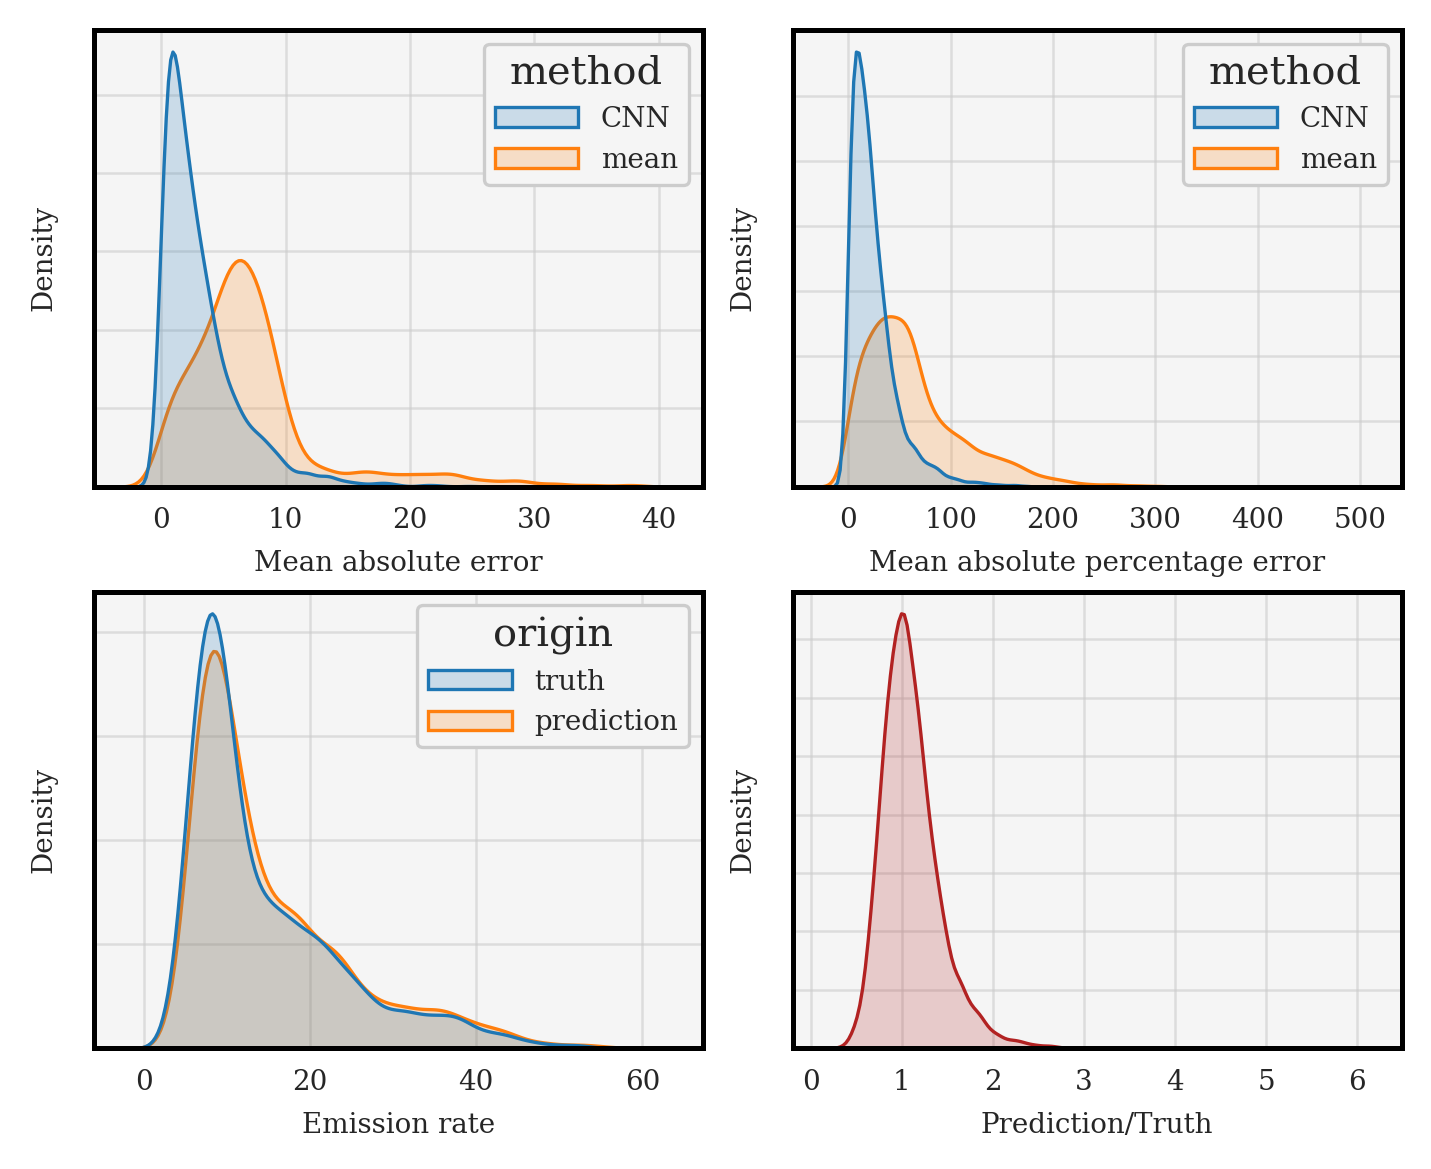

In [11]:
model_eval.get_summary_histo_inversion(model, data_val)

nwbce: tf.Tensor(4.7776527, shape=(), dtype=float32)
idx 3508
origin: smart_2km_Tur_64
time: 2015-02-06T09:00:00.000000000
emiss: [13.59573  12.036     8.915542]
nwbce: tf.Tensor(0.26356316, shape=(), dtype=float32)
idx 4301
origin: smart_2km_Schp_64
time: 2015-06-21T11:00:00.000000000
emiss: [6.905538 6.962628 6.163816]
nwbce: tf.Tensor(0.11393547, shape=(), dtype=float32)
idx 2750
origin: smart_2km_Jan_64
time: 2015-10-07T05:00:00.000000000
emiss: [28.22937 25.05334 25.40612]
1/1 [==============================] - 0s 15ms/step


<Figure size 1920x1440 with 0 Axes>

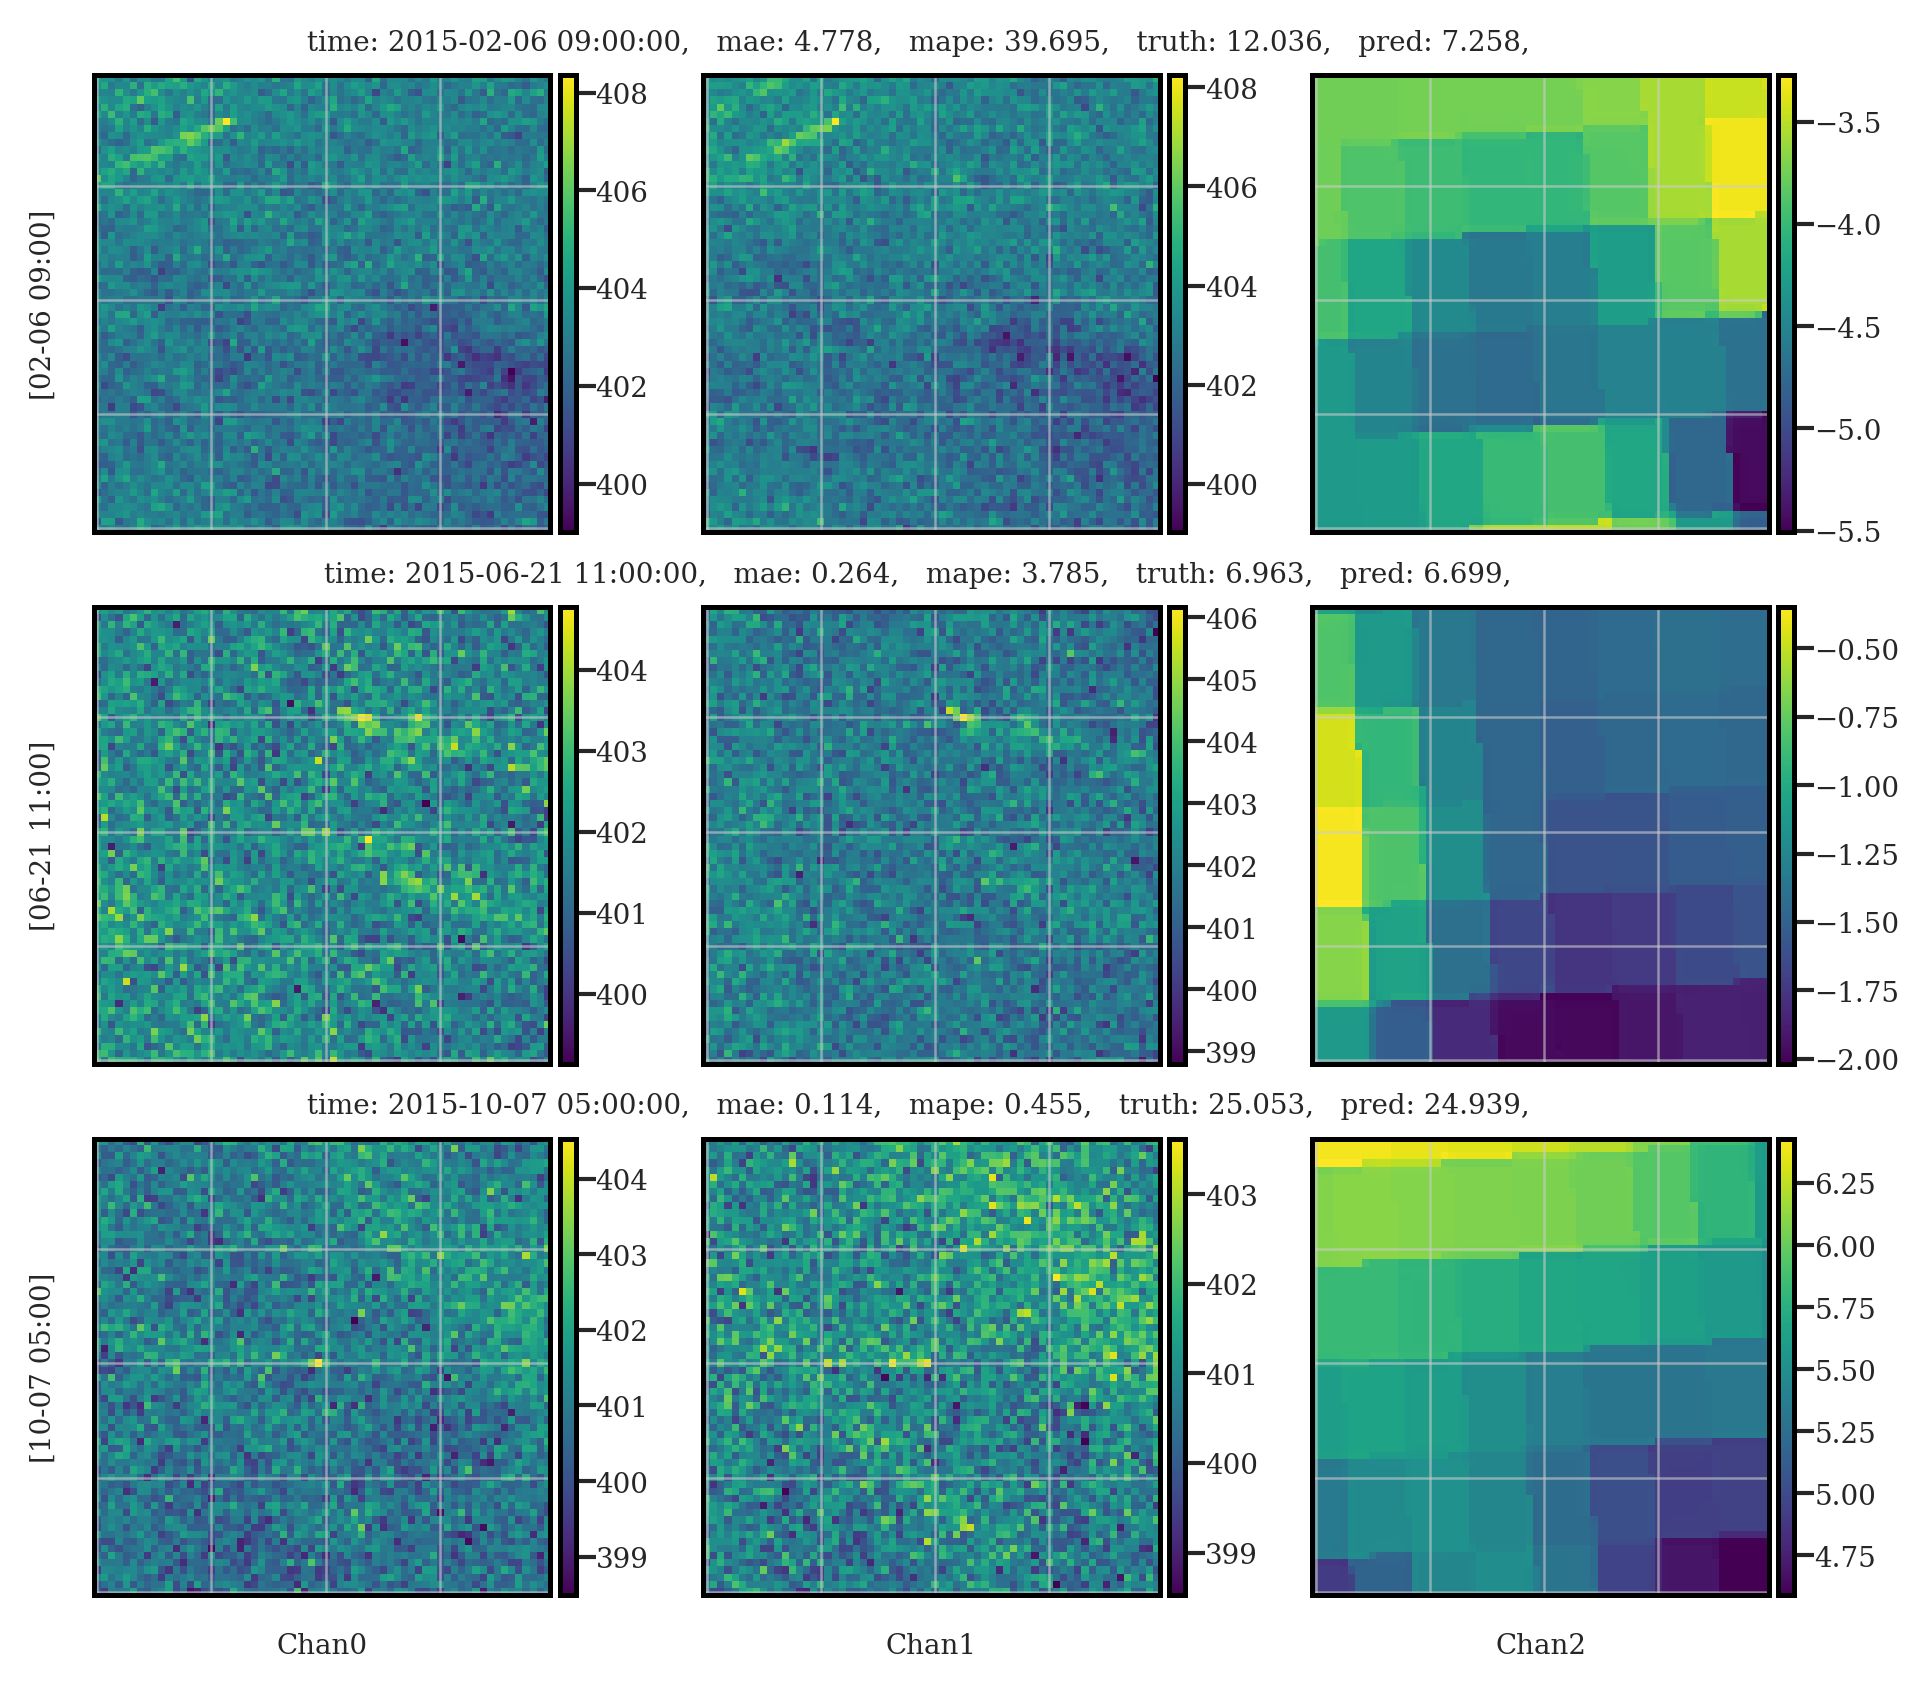

In [12]:
model_eval.plot_inversion_examples(
    data_val, metrics_val["mae"], metrics_val["mape"], model
)